# Titanic: Auto EDA + Different Data Preprocessing & Modeling Techniques compared with Pipeline & RandomSearchCV
Notebook written by Pedro de Matos Gonçalves

Thanks to Andreas C. Muller, Sarah Guido & other co-authors, for writting the book **"Introduction to Machine Learning with Python"**. A great source of knowledge for Data Scientists of all levels.

## *Section 1 - Data Exploration*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N
from scipy import stats # statistical library
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing
import plotly.graph_objs as go # interactive plotting library
import matplotlib.pyplot as plt # plotting library
import pandas_profiling # library for automatic EDA
%pip install autoviz # installing and importing autoviz, another library for automatic data visualization
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print("")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


To begin our analysis, lets take our first look at the dataset. To save some precious time on our Exploratory Data Analysis process, we are going to use 2 libraries: **"pandas_profiling"** and **"autoviz"**.

In [2]:
# Importing the data and displaying some rows
df = pd.read_csv("/kaggle/input/titanic/train.csv")

display(df.head(10))

PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
5            6         0       3                                   Moran, Mr. James    male   NaN      0      0            330877   8.4583   NaN        Q
6            7         0       1                            McCarthy, Mr. Timothy J    male  54.0      0      0             17463  51.8625   E46        S
7            8         0       3                     Palsson, Master. Gosta Leonard    male   2.0      3      1            349909  21.0750   NaN        S
8            9         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0      2            347742  11.1333   NaN        S
9           10         1       2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1      0            237736  30.0708   NaN        C

In [3]:
# The pandas profiling library is really useful on helping us understand the data we're working on.
# It saves us some precious time on the EDA process.
report = pandas_profiling.ProfileReport(df)

In [4]:
# Let's now visualize the report generated by pandas_profiling.
display(report)

# Also, there is an option to generate an .HTML file containing all the information generated by the report.
# report.to_file(output_file='report.html')

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 2.186


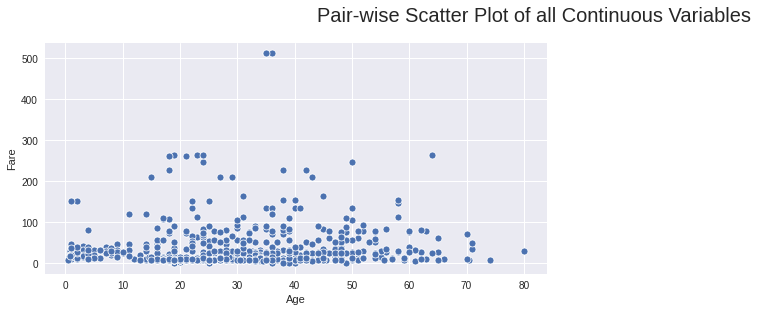

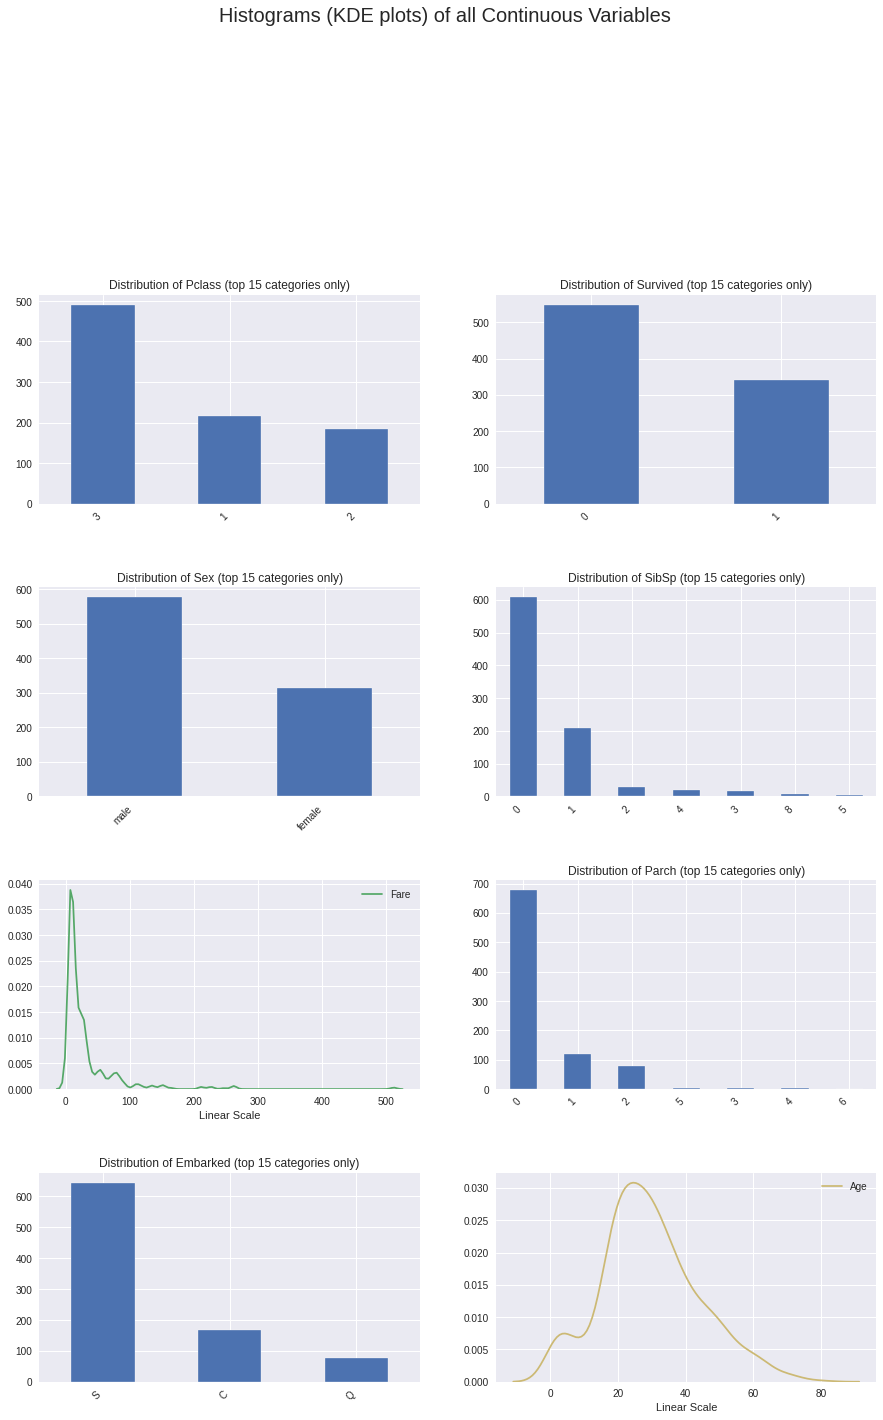

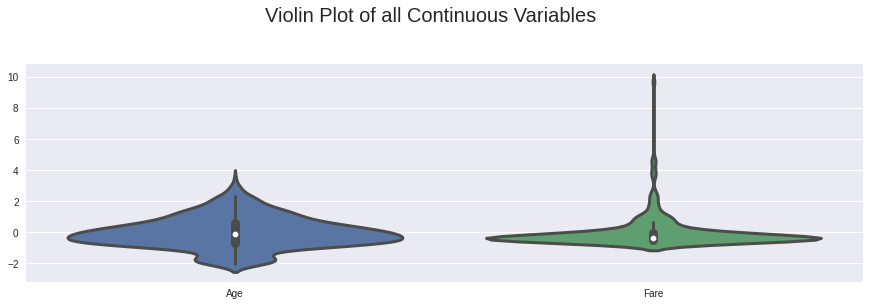

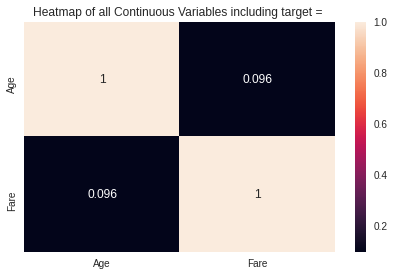

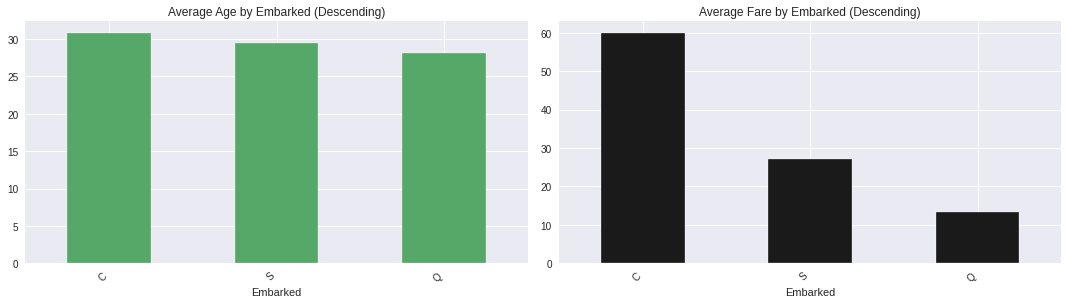

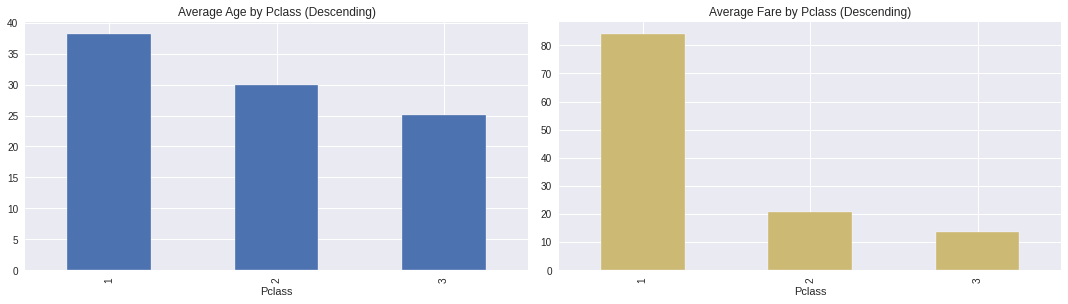

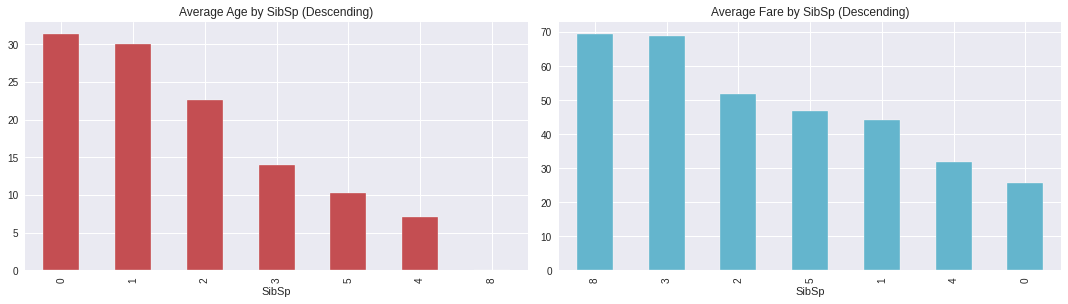

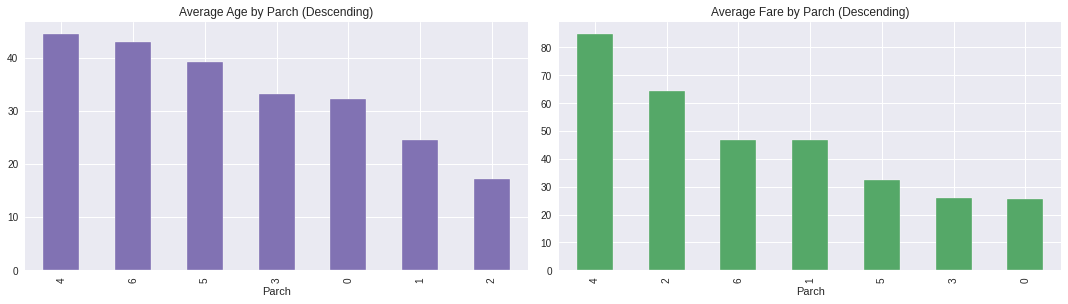

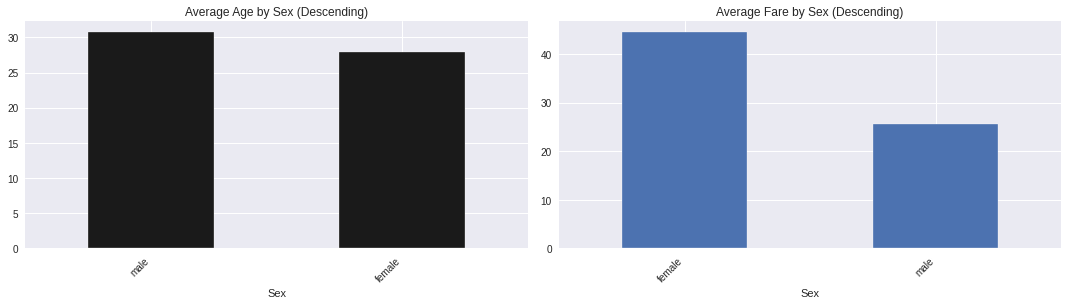

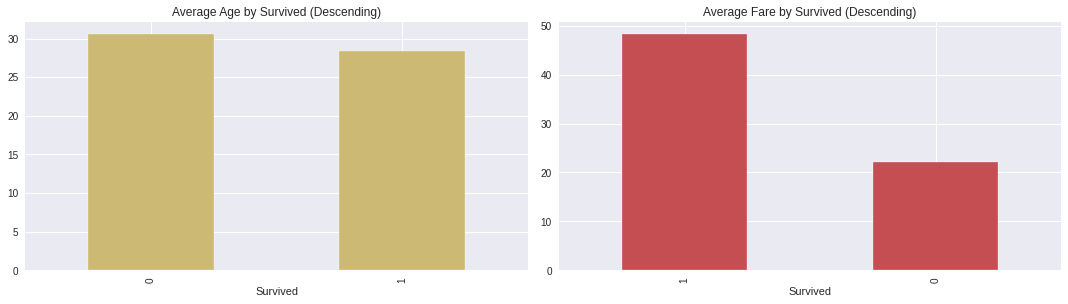

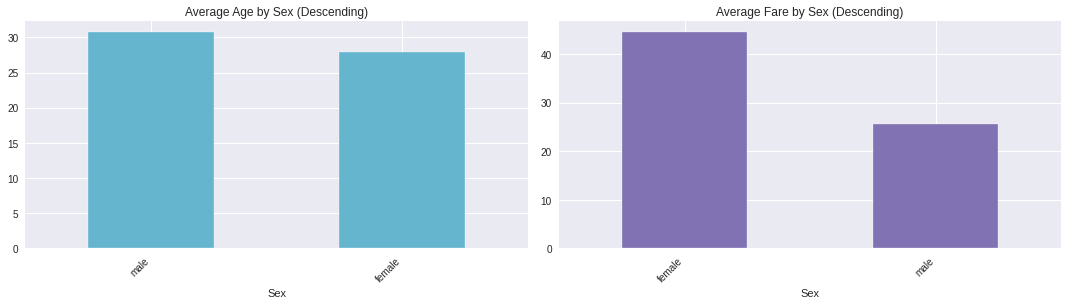

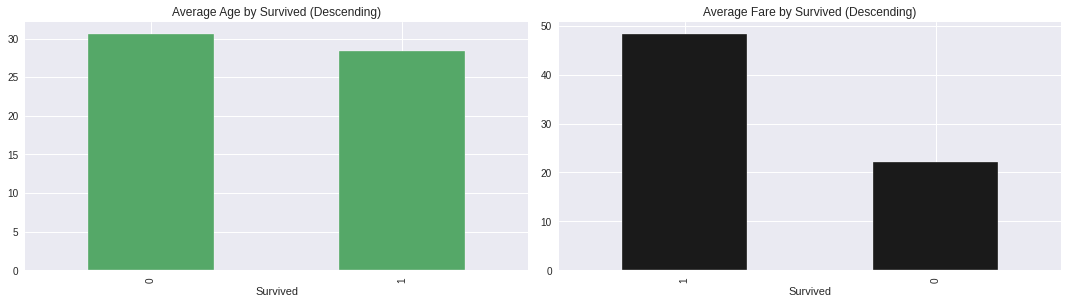

In [5]:
# Another great library for automatic EDA is AutoViz.
# With this library, several plots are generated with only 1 line of code.
# When combined with pandas_profiling, we obtain lots of information in a
# matter of seconds, using less then 5 lines of code.
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("/kaggle/input/titanic/train.csv")

Using the power of both automatic EDA libraries listed above, we can observe each variable's behaviour individually, with plots that goes from Histograms to Boxplots, Correlation Matrix and much more. It speeds up time and minimizes the effort spent on the initial process of our work.

We can gather some really useful information from both reports. Let's now point some of them out:

* Our classes are not that much disbalanced. We have ~38% of the passengers into class "1" (survived) and ~62% of the passengers into class "0" (didn't survive).


* The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.


* Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male.


* Almost 20% of the values in the "Age" column are missing. We can fill out these nulls with various techniques, such as filling them with the distribution's mean. The ages distribution is a little bit skewed, with it's mean being around 30 years old, and it's standard deviation being close to 15. The oldest passenger we have in this dataset is 80 years old.


* According to the "SibSP" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship. That is also applied when we check out the "Parch" column.


* The distribution of Fares is much more skewed. It's mean value is around 32, with it's standard deviation being close to 50. It's minimum value is 0, and it's maximum value is 512.3292. That means that we're going to have to deal with this column carefully if we plan to use models such as SVMs.


* When ckecking the "Embarked" column, it shows us that 72.3% of the passengers embarked at Southampton port, 18.9% of the passengers at Cherbourg port and 8.6% of the passengers at Queenstown port.


* "Fare" values are higher for passengers with "Pclass" = 1, lower for passengers with "Pclass" = 2 and even lower for passengers with "Pclass" = 3. Logically, it looks like the classification of "Pclass" is defined by the value of the passenger's fare.



## More Exploration

Before we go to the modeling part, let's take a look at a few more plots that gives us a different perspective from the ones generated above. That may give us further insights and help us understand the differences between the passengers that survived the catastrophe and the people that didn't. For these visualizations, we are going to use Plotly, a library that gives us beautiful plots and allows us to interact with them.

First, let's take a look at the differences between the ages of both groups, using a Violin plot.

In [6]:
# Creating different datasets for survivors and non-survivors
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

In [7]:
# Filling in the data inside the Violin Objects
violin_survivors = go.Violin(
    y=df_survivors['Age'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Age'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Age" of survivors vs Ages of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [8]:
# First distribution for the hypothesis test: Ages of survivors
dist_a = df_survivors['Age'].dropna()

# Second distribution for the hypothesis test: Ages of non-survivors
dist_b = df_nonsurvivors['Age'].dropna()

In [9]:
# Z-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat, p_value = ztest(dist_a, dist_b)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat))
print("P value = " + str(p_value)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat_2, p_value_2 = stats.ttest_ind(dist_a, dist_b)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_2))
print("P value = " + str(p_value_2)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = -2.06668694625381
P value = 0.03876366199189209

----- T Test Results -----
T stat. = -2.06668694625381
P value = 0.03912465401348249


As we can see both from the plot and hypothesis tests showed above, there is actually a statistically significant difference between the means of both distributions (ages of survivors and non-survivors). Let's do some more exploring to see what further information we can gather from this data.

In [10]:
# Taking the count of each Sex value inside the Survivors
df_survivors_sex = df_survivors['Sex'].value_counts()
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()
df_nonsurvivors_sex = pd.DataFrame({'Sex':df_nonsurvivors_sex.index, 'count':df_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = df_survivors_sex['Sex'],
   values = df_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = df_nonsurvivors_sex['Sex'],
   values = df_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [11]:
# Taking the count of each Pclass value inside the Survivors
df_survivors_pclass = df_survivors['Pclass'].value_counts()
df_survivors_pclass = pd.DataFrame({'Pclass':df_survivors_pclass.index, 'count':df_survivors_pclass.values})

# Taking the count of each Pclass value inside the Survivors
df_nonsurvivors_pclass = df_nonsurvivors['Pclass'].value_counts()
df_nonsurvivors_pclass = pd.DataFrame({'Pclass':df_nonsurvivors_pclass.index, 'count':df_nonsurvivors_pclass.values})


# Creating the plotting objects
pie_survivors_pclass = go.Pie(  
   labels = df_survivors_pclass['Pclass'],
   values = df_survivors_pclass['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['#636EFA', '#EF553B', '#00CC96'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_pclass = go.Pie(  
   labels = df_nonsurvivors_pclass['Pclass'],
   values = df_nonsurvivors_pclass['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['#EF553B', '#00CC96', '#636EFA'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_pclass, pie_nonsurvivors_pclass]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Pclass" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

From the pie chart showed above, we can notice a peculiar behavior: when looking at passengers that didn't survive, ~68% of them were at "Pclass" 3. When looking at passengers that survived, only ~35% of them were at "Pclass" 3.

At the same point of view, when looking at passengers that survived, ~40% of them were at "Pclass" 1. At the non-survivors, only 14.6% of them were at "Pclass" 1.

It seems that there is some kind of relation between "P-class" and the fact of a passenger surviving the accident or not. Let's get into more detail.

In [12]:
# Checking out the differences between Fare distribution for survivors and non-survivors
fare_survivors_box = go.Box(  
   x=df_survivors['Fare'],
   name='Survivors',
   marker=dict(color='navy')
)

fare_nonsurvivors_box = go.Box(  
   x=df_nonsurvivors['Fare'],
   name='Non-Survivors',
   marker=dict(color='steelblue')
)
  
data = [fare_nonsurvivors_box, fare_survivors_box]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" value of survivors vs "Fare" value of non-survivors',
    barmode='stack',
    xaxis=dict(
        title='Fare distribution'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [13]:
# Third distribution for the hypothesis test - Fares of survivors
dist_c = df_survivors['Fare'].dropna()

# Fourth distribution for the hypothesis test - Fares of non-survivors
dist_d = df_nonsurvivors['Fare'].dropna()

In [14]:
# Z-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_3, p_value_3 = ztest(dist_c, dist_d)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat_3))
print("P value = " + str(p_value_3)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_4, p_value_4 = stats.ttest_ind(dist_c, dist_d)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_4))
print("P value = " + str(p_value_4)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = 7.939191660871055
P value = 2.035031103573989e-15

----- T Test Results -----
T stat. = 7.939191660871055
P value = 6.120189341924198e-15


Checking out the plots and hypothesis tests over fare distributions, comparing Survivors and non-Survivors, we can again observe that there is a statistically significant difference between the means of both groups. 

When checking out the boxplots, we can see that fare values of survivors are generally higher, when compared to fare values of non-survivors. This information is probably related to the "Pclass" percentages we have seen before on the pie plots.

---

## *Section 2 - Modeling*

Now that we have some nice context about the data we are working with, let's dive into the modeling part.

First of all, we import the libraries we're going to use.

In [15]:
import collections
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

## Feature Engineering 
To help us get a better performance, we can create new features based on the original features of our dataset.

In [16]:
# Creating a categorical variable for Ages
df['AgeCat'] = ''
df['AgeCat'].loc[(df['Age'] < 18)] = 'young'
df['AgeCat'].loc[(df['Age'] >= 18) & (df['Age'] < 56)] = 'mature'
df['AgeCat'].loc[(df['Age'] >= 56)] = 'senior'


# Creating a categorical variable for Family Sizes
df['FamilySize'] = ''
df['FamilySize'].loc[(df['SibSp'] <= 2)] = 'small'
df['FamilySize'].loc[(df['SibSp'] > 2) & (df['SibSp'] <= 5 )] = 'medium'
df['FamilySize'].loc[(df['SibSp'] > 5)] = 'large'


# Creating a categorical variable to tell if the passenger is alone
df['IsAlone'] = ''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) > 0)] = '0'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0)] = '1'


# Creating a categorical variable to tell if the passenger is a Young/Senior male or a Young/Senior female
df['SexCat'] = ''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] < 50)] = 'youngmale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] >= 50)] = 'seniormale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] < 50)] = 'youngfemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] >= 50)] = 'seniorfemale'


# # Taking another look at the data
df.head(10)

PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  AgeCat FamilySize IsAlone       SexCat
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S  mature      small       0    youngmale
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C  mature      small       0  youngfemale
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  mature      small       1  youngfemale
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S  mature      small       0  youngfemale
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S  mature      small       1    youngmale
5            6         0       3                                   Moran, Mr. James    male   NaN      0      0            330877   8.4583   NaN        Q              small       1             
6            7         0       1                            McCarthy, Mr. Timothy J    male  54.0      0      0             17463  51.8625   E46        S  mature      small       1   seniormale
7            8         0       3                     Palsson, Master. Gosta Leonard    male   2.0      3      1            349909  21.0750   NaN        S   young     medium       0    youngmale
8            9         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0      2            347742  11.1333   NaN        S  mature      small       0  youngfemale
9           10         1       2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1      0            237736  30.0708   NaN        C   young      small       0  youngfemale

After creating new features, we can drop useless columns that we won't use in the training process.

In [17]:
# Separating our target
target = df['Survived']


# Dropping unused columns
df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


# Selecting categorical columns
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'AgeCat', 'FamilySize', 'IsAlone', 'SexCat']


# Transforming them into categorical type, if not already
for col in categorical_columns:
    df[col] = df[col].astype('category')


# Selecting numeric columns
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']

## Balancing Data

As we saw earlier on EDA section, our data is pretty much balanced, but we have a small number of observations in our training set. To try tackling this problem, we can take different approaches.

Three common ones are  **RandomUnderSampling**, **SMOTE** and **SMOTEENN**. We can try using one of them to balance our data. 

We also have the option of not balancing data, going straight to the Pipeline part.

In [18]:
# You can call any of the functions below, if you wish, inside the "defineBestModelPipeline()" function

def balancingClassesRus(x_train, y_train):
    
    # Using RandomUnderSampler to balance our training data points
    rus = RandomUnderSampler(random_state=7)
    features_balanced, target_balanced = rus.fit_resample(x_train, y_train)
    
    print("Count for each class value after RandomUnderSampler:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmoteenn(x_train, y_train):
    
    # Using SMOTEEN to balance our training data points
    smn = SMOTEENN(random_state=7)
    features_balanced, target_balanced = smn.fit_resample(x_train, y_train)
    
    print("Count for each class value after SMOTEEN:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmote(x_train, y_train):

    # Using SMOTE to to balance our training data points
    sm = SMOTE(random_state=7)
    features_balanced, target_balanced = sm.fit_resample(x_train, y_train)

    print("Count for each class value after SMOTE:", collections.Counter(target_balanced))

    return features_balanced, target_balanced


## Model training & Evaluation functions

After all the preprocessing, we are now ready for building and evaluating different Machine Learning models.

First, let's create a function responsible for evaluating our classifiers on a test set we will create later.

In [19]:
# Function responsible for checking our model's performance on the test data
def testSetResultsClassifier(classifier, x_test, y_test):
    predictions = classifier.predict(x_test)
    
    results = []
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append(f1)
    results.append(precision)
    results.append(recall)
    results.append(roc_auc)
    results.append(accuracy)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("F1 score, Precision, Recall, ROC_AUC score, Accuracy:")
    print(results)
    
    return results

Now, we fit several different data preprocessing, feature selection and modeling techniques inside a Pipeline, to check which group of techniques has better performance.

In [20]:
# Building a Pipeline responsible for finding best model and it's parameters
def defineBestModelPipeline(df, target, categorical_columns, numeric_columns):
    
    # Splitting data into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)
    y_train = y_train.to_numpy() # Transforming training targets into numpy arrays
    y_test = y_test.to_numpy() # Transforming test targets into numpy arrays
    
    
    # # Obtaining balanced data for modeling using Random Under Sampling
    #x_train, y_train = balancingClassesRus(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTEENN
    #x_train, y_train = balancingClassesSmoteenn(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTE
    #x_train, y_train = balancingClassesSmote(x_train, y_train)
    
    
    
    # Pipeline's data transformations
    # 1st -> Numeric Transformers (we'll try several different ones)
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=7)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=49)),
                                            ('scaler', StandardScaler())])
    
    numeric_transformer_3 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_4 = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    # 2nd -> Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    # 3rd -> Different Data Transformation Steps, each one with a different numerical transformation
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    
    
    # Applying different data transformations in RandomSearchCV to find 
    # the best imputing strategy, the best feature engineering strategy
    # and the best model with it's parameters
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), # Initializing data transformation step by choosing any of the above
                           ('feature_eng', PCA()), # Initializing feature engineering step by choosing any desired method
                           ('clf', SVC())]) # Initializing modeling step of the pipeline with any model object
                           #memory='cache_folder') -> Used to optimize memory when needed
    
    
    
    # Now, defining the grid of parameters to search for. RandomSearchCV will randomly chose
    # options for each step inside the dictionaries, and return the best one for us as our final pipeline.
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [KNeighborsClassifier()],
                     'clf__n_neighbors': stats.randint(1, 30),
                     'clf__metric': ['minkowski', 'euclidean']},

        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LogisticRegression()],
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': stats.uniform(0.01, 10)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [SVC()],
                     'clf__C': stats.uniform(0.01, 1),
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [DecisionTreeClassifier()],
                     'clf__criterion': ['gini', 'entropy'],
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': stats.randint(1, 5)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': stats.randint(10, 175),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': stats.randint(1, 5)},
        
                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [ExtraTreesClassifier()],
                     'clf__n_estimators': stats.randint(10, 150),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': stats.randint(1, 6)},

                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [GradientBoostingClassifier()],
                     'clf__n_estimators': stats.randint(10, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': stats.randint(1, 4)},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': stats.randint(1, 4)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__eta': stats.uniform(0.01, 1),
                     'clf__max_depth': stats.randint(1, 6),
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [StackingClassifier(estimators=[('svc', SVC(C=1, gamma=1)),
                                                            ('rf', RandomForestClassifier(max_depth=5, max_features=None, n_estimators=40, n_jobs=-1)),
                                                            ('xgb', XGBClassifier(eta=0.4, gamma=0.4, max_depth=4, n_estimators=25))], 
                                                final_estimator=LogisticRegression(C=1))]},
        
        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [StackingClassifier(estimators=[('lgbm', LGBMClassifier(n_estimators=20, learning_rate=0.3, max_depth=6)),
                                                            ('etc', ExtraTreesClassifier(max_depth=5, max_features=6, n_estimators=25)),
                                                            ('gbt', GradientBoostingClassifier(learning_rate=0.6, max_depth=5, n_estimators=12))], 
                                                final_estimator=LogisticRegression(C=0.1))]},
        
        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [VotingClassifier(estimators=[('dtc', DecisionTreeClassifier(max_features=None, max_depth=7)),
                                                          ('etc', ExtraTreesClassifier(max_depth=8, max_features=None, n_estimators=30)),
                                                          ('rf', RandomForestClassifier(max_depth=6, max_features=None, n_estimators=40, n_jobs=-1))],
                                              voting='soft')]},
        
        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [VotingClassifier(estimators=[('gbt', GradientBoostingClassifier(learning_rate=0.8, max_depth=None, n_estimators=18)),
                                                          ('lgbm', LGBMClassifier(n_estimators=30, learning_rate=0.6, max_depth=None)),
                                                          ('xgb', XGBClassifier(eta=0.55, gamma=0.75, max_depth=None, n_estimators=35))],
                                              voting='soft')]}
                ]
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    best_model_pipeline = RandomizedSearchCV(pipe, params_grid, n_iter=300, 
                                             scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=5, random_state=49)

    best_model_pipeline.fit(x_train, y_train)
    
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [21]:
# Calling the function above, returing train/test data and best model's pipeline
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, categorical_columns, numeric_columns)


# Checking best model's performance on test data
test_set_results = testSetResultsClassifier(best_model_pipeline, x_test, y_test)



#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#

 ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('frequent',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(use_cat_names=True))]),
                                 ['Pclass', 'Sex', 'Embarked', 'AgeCat',
                                  'FamilySize', 'IsAlone', 'SexCat'])])


#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#

After going through all steps in RandomSearchCV, we can check the results from it's steps using the "cv_results_" atrribute.

In [22]:
# Visualizing all results and metrics, from all models, obtained by the RandomSearchCV steps
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time                                          param_clf                         param_data_transformations             param_feature_eng param_clf__max_depth param_clf__max_features param_clf__n_estimators param_clf__C param_clf__gamma param_clf__eta param_clf__learning_rate param_clf__criterion param_clf__penalty param_clf__metric param_clf__n_neighbors                                             params  split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  split4_test_accuracy  mean_test_accuracy  std_test_accuracy  rank_test_accuracy  split0_test_precision  split1_test_precision  split2_test_precision  split3_test_precision  split4_test_precision  mean_test_precision  std_test_precision  rank_test_precision  split0_test_recall  split1_test_recall  split2_test_recall  split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  rank_test_recall  split0_test_f1  \
0         0.635683      0.042823         0.000000        0.000000  StackingClassifier(estimators=[('lgbm',\n     ...  ColumnTransformer(transformers=[('num',\n     ...          PolynomialFeatures()                  NaN                     NaN                     NaN          NaN              NaN            NaN                      NaN                  NaN                NaN               NaN                    NaN  {'clf': StackingClassifier(estimators=[('lgbm'...                   NaN                   NaN                   NaN                   NaN                   NaN                 NaN                NaN                 225                    NaN                    NaN                    NaN                    NaN                    NaN                  NaN                 NaN                  225                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN               225             NaN   
1         0.560683      0.007568         0.165464        0.012791                             ExtraTreesClassifier()  ColumnTransformer(transformers=[('num',\n     ...          PCA(n_components=10)                    5                    log2                     143          NaN              NaN            NaN                      NaN                  NaN                NaN               NaN                    NaN  {'clf': ExtraTreesClassifier(), 'clf__max_dept...              0.805970              0.858209              0.783582              0.774436              0.872180            0.818876           0.039435                  28               0.837838               0.880952               0.823529               0.812500               0.883721             0.847708            0.029407                   18            0.607843            0.725490            0.549020                0.52                0.76          0.632471         0.095012               147        0.704545   
2         0.008598      0.002037         0.000000        0.000000                                              SVC()  ColumnTransformer(transformers=[('num',\n     ...          TSNE(n_components=8)                  NaN                     NaN                     NaN     0.220424         0.779754            NaN                      NaN                  NaN                NaN               NaN                    NaN  {'clf': SVC(), 'clf__C': 0.22042383598676585, ...                   NaN                   NaN                   NaN                   NaN                   NaN                 NaN                NaN                 246                    NaN                    NaN                    NaN                    NaN                    NaN                  NaN                 NaN                  246                 NaN                 NaN                 NaN                 NaN                 NaN               NaN              NaN               246             NaN   
3         0.007344      0.000265         0.000000        

In [23]:
# Now visualizing all results and metrics obtained only by the best classifier
display(df_results[df_results['rank_test_accuracy'] == 1])

mean_fit_time  std_fit_time  mean_score_time  std_score_time                                          param_clf                         param_data_transformations param_feature_eng param_clf__max_depth param_clf__max_features param_clf__n_estimators param_clf__C param_clf__gamma param_clf__eta param_clf__learning_rate param_clf__criterion param_clf__penalty param_clf__metric param_clf__n_neighbors                                             params  split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  split4_test_accuracy  mean_test_accuracy  std_test_accuracy  rank_test_accuracy  split0_test_precision  split1_test_precision  split2_test_precision  split3_test_precision  split4_test_precision  mean_test_precision  std_test_precision  rank_test_precision  split0_test_recall  split1_test_recall  split2_test_recall  split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  rank_test_recall  split0_test_f1  split1_test_f1  \
276       0.259954      0.050071         0.109888        0.019061  LGBMClassifier(learning_rate=0.585918559702840...  ColumnTransformer(transformers=[('num',\n     ...              None                    3                     NaN                      59          NaN              NaN            NaN                 0.585919                  NaN                NaN               NaN                    NaN  {'clf': LGBMClassifier(learning_rate=0.5859185...              0.813433              0.880597              0.798507              0.827068              0.834586            0.830838           0.027758                   1                  0.825               0.857143               0.772727                0.77551               0.769231             0.799922            0.035158                   75            0.647059            0.823529            0.666667                0.76                 0.8          0.739451         0.070699                 3        0.725275            0.84   

     split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  split0_test_roc_auc  split1_test_roc_auc  split2_test_roc_auc  split3_test_roc_auc  split4_test_roc_auc  mean_test_roc_auc  std_test_roc_auc  rank_test_roc_auc  
276        0.715789        0.767677        0.784314      0.766611     0.044703             1             0.836404              0.89889             0.813607             0.869639             0.851325           0.853973           0.02901                 22

## Plotting Feature Importances

If we want to, it's also possible to check the feature importances of the best model, in case they're easy to understand and explain.

Just remember that, if the best pipeline found in RandomSearchCV applies dimensionality reduction or creates new features using PolynomialFeatures, it will be much harder to explain importances.

In a scenario that no transformations are applied to the features inside the pipeline, if the model is tree-based (RandomForestClassifier, for example), or linear regression-based (Logistic Regression, for example), then explaining most important features becomes much easier.

In [24]:
# Here, we access the categorical feature names generated by OneHotEncoder, and then concatenate them
# with the numerical feature names, in the same order our pipeline is applying data transformations.
categorical_features_after_onehot = best_model_pipeline.best_estimator_.named_steps['data_transformations']\
                                        .transformers_[1][1].named_steps['onehot'].get_feature_names()

feature_names_in_order = numeric_columns + categorical_features_after_onehot

print(feature_names_in_order)

['Age', 'SibSp', 'Parch', 'Fare', '0_1.0', '0_3.0', '0_2.0', '1_male', '1_female', '2_S', '2_C', '2_Q', '3_', '3_mature', '3_young', '3_senior', '4_small', '4_medium', '4_large', '5_1', '5_0', '6_', '6_youngmale', '6_youngfemale', '6_seniorfemale', '6_seniormale']


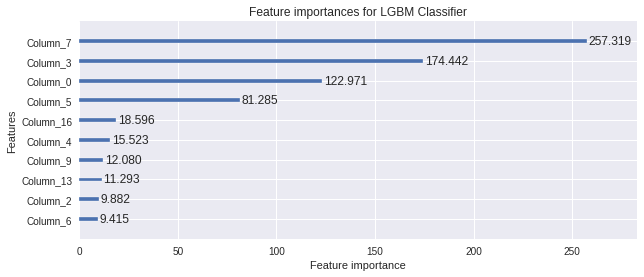

In [25]:
# # Plotting feature importances of the best model, if sklearn tree-based (top 5 features)
# print("\n#---------------- Bar plot with feature importances ----------------#")
# feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['clf'].feature_importances_, index=feature_names_in_order)
# feat_importances.nlargest(5).plot(kind='barh')


# # Plotting feature importances of the best model, if linear regression-based (top 5 features)
# print("\n#---------------- Bar plot with feature importances ----------------#")
# feat_importances = pd.Series(best_model_pipeline.best_estimator_.named_steps['clf'].coef_[0], index=feature_names_in_order)
# feat_importances.nlargest(5).plot(kind='barh')


# # Plotting feature importances for XGB Model
# plot_importance_xgb(best_model_pipeline.best_estimator_.named_steps['clf'], height=0.4, 
# title='Feature Importances for XGB Classifier', importance_type='gain')


# Plotting feature importances for LGBM Model
plot_importance_lgbm(best_model_pipeline.best_estimator_.named_steps['clf'], 
                     figsize=(10, 4), title='Feature importances for LGBM Classifier',
                     importance_type='gain', max_num_features=10)

---

# Predictions

Now that we have tried different preprocessing and modeling techniques, resulting in a final best pipeline, let's use it to predict the test data provided by kaggle.

In [26]:
# Importing the data and displaying some rows
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Dropping the unnecessary columns
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Remember:** All transformations that were done in the training dataset must be done in the test set.

In [27]:
# Creating a categorical variable for Ages
df_test['AgeCat'] = ''
df_test['AgeCat'].loc[(df_test['Age'] < 18)] = 'young'
df_test['AgeCat'].loc[(df_test['Age'] >= 18) & (df_test['Age'] < 56)] = 'mature'
df_test['AgeCat'].loc[(df_test['Age'] >= 56)] = 'senior'


# Creating a categorical variable for Family Sizes
df_test['FamilySize'] = ''
df_test['FamilySize'].loc[(df_test['SibSp'] <= 2)] = 'small'
df_test['FamilySize'].loc[(df_test['SibSp'] > 2) & (df_test['SibSp'] <= 5 )] = 'medium'
df_test['FamilySize'].loc[(df_test['SibSp'] > 5)] = 'large'


# Creating a categorical variable to tell if the passenger is alone
df_test['IsAlone'] = ''
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) > 0)] = '0'
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) == 0)] = '1'


# Creating a categorical variable to tell if the passenger is a Young/Senior male or a Young/Senior female
df_test['SexCat'] = ''
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] < 50)] = 'youngmale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] >= 50)] = 'seniormale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] < 50)] = 'youngfemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] >= 50)] = 'seniorfemale'


# Applying best_model_pipeline:
# Step 1 -> Transforming data the same way we did in the training set;
# Step 2 -> making predictions using the best model obtained by RandomSearchCV.
test_predictions = best_model_pipeline.predict(df_test)
print(test_predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [28]:
# Generating the predictions file that is going to be submitted to the competition
df_submission = pd.read_csv("/kaggle/input/titanic/test.csv")

df_submission['Survived'] = test_predictions # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['PassengerId', 'Survived']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

In [29]:
# Checking if the number of rows is OK (the file is expected to have 418 rows)
df_submission.count()

PassengerId    418
Survived       418
dtype: int64

In [30]:
# Writing submitions to CSV file
df_submission.to_csv('submission.csv', index=False)